In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X.shape, y.shape

((150, 4), (150,))

In [8]:
iris_df = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:, 0],
                        'X3': X[:, 0],
                        'X4': X[:, 0],
                        'y': y
})

In [9]:
iris_df.head(10)

,X1,X2,X3,X4,y
0,5.1,5.1,5.1,5.1,0
1,4.9,4.9,4.9,4.9,0
2,4.7,4.7,4.7,4.7,0
3,4.6,4.6,4.6,4.6,0
4,5.0,5.0,5.0,5.0,0
5,5.4,5.4,5.4,5.4,0
6,4.6,4.6,4.6,4.6,0
7,5.0,5.0,5.0,5.0,0
8,4.4,4.4,4.4,4.4,0
9,4.9,4.9,4.9,4.9,0


In [10]:
iris_df.y.value_counts()

y
0    50
1    50
2    50
Name: count, dtype: int64

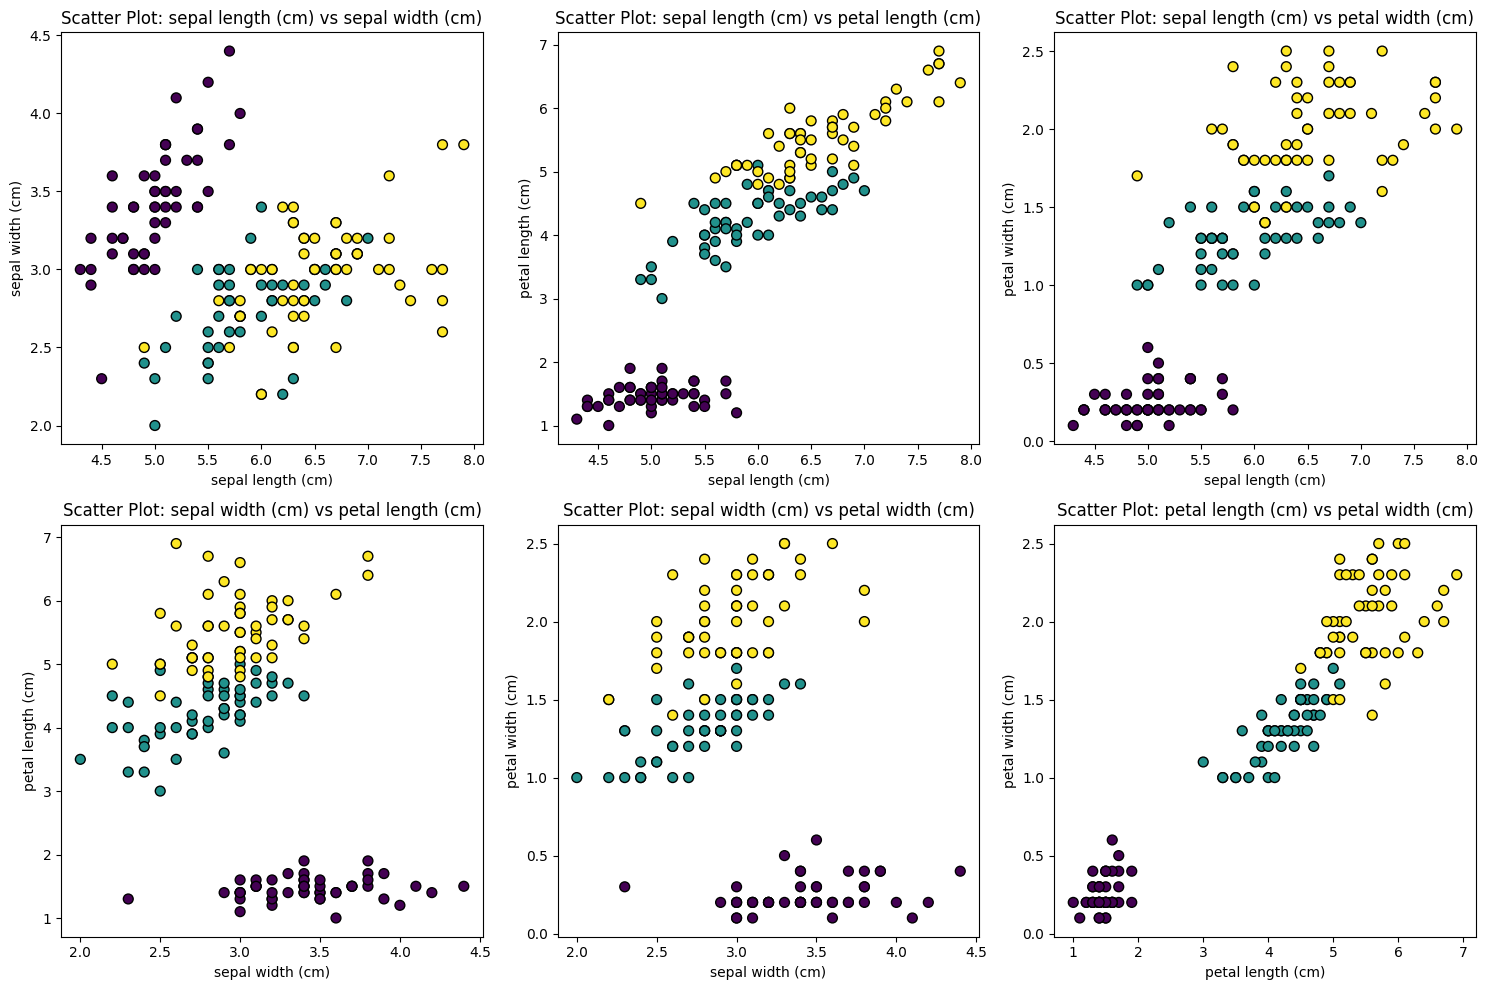

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
feature_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for ax, features in zip(axes.flatten(), feature_combinations):
  feature1, feature2 = features
  ax.scatter(X[:, feature1], X[:, feature2], c=y, cmap='viridis', edgecolor='k', s=50)
  ax.set_xlabel(iris.feature_names[feature1])
  ax.set_ylabel(iris.feature_names[feature2])
  ax.set_title(f'Scatter Plot: {iris.feature_names[feature1]} vs {iris.feature_names[feature2]}')

plt.tight_layout()
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [20]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64).to(device)

In [21]:
class SimpleClassifier(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.layer_1 = nn.Linear(in_features, 120)
    self.layer_2 = nn.Linear(120, 10)
    self.layer_3 = nn.Linear(10, out_features)

  def forward(self, x):
    x = self.layer_3(self.layer_2(self.layer_1(x)))
    return x

In [22]:
in_features = X_train.shape[1]
num_classes = len(set(y))

model = SimpleClassifier(in_features, num_classes).to(device)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [26]:
num_epochs = 1000

for epoch in range(num_epochs):
  model.train()

  outputs = model(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)

  _, predicted_labels = torch.max(outputs, 1)
  correct_predictions = (predicted_labels == y_train_tensor).sum().item()

  total_samples = len(y_train_tensor)
  acc = correct_predictions / total_samples

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], loss: {loss.item():.4f}, Accuracy: {acc:.4f}')

Epoch [10/1000], loss: 0.7784, Accuracy: 0.8083
Epoch [20/1000], loss: 0.6292, Accuracy: 0.8417
Epoch [30/1000], loss: 0.5485, Accuracy: 0.8333
Epoch [40/1000], loss: 0.4988, Accuracy: 0.8500
Epoch [50/1000], loss: 0.4654, Accuracy: 0.8500
Epoch [60/1000], loss: 0.4412, Accuracy: 0.8500
Epoch [70/1000], loss: 0.4226, Accuracy: 0.8500
Epoch [80/1000], loss: 0.4077, Accuracy: 0.8500
Epoch [90/1000], loss: 0.3950, Accuracy: 0.8500
Epoch [100/1000], loss: 0.3840, Accuracy: 0.8500
Epoch [110/1000], loss: 0.3742, Accuracy: 0.8500
Epoch [120/1000], loss: 0.3653, Accuracy: 0.8500
Epoch [130/1000], loss: 0.3570, Accuracy: 0.8500
Epoch [140/1000], loss: 0.3493, Accuracy: 0.8500
Epoch [150/1000], loss: 0.3421, Accuracy: 0.8583
Epoch [160/1000], loss: 0.3353, Accuracy: 0.8583
Epoch [170/1000], loss: 0.3288, Accuracy: 0.8750
Epoch [180/1000], loss: 0.3227, Accuracy: 0.8750
Epoch [190/1000], loss: 0.3168, Accuracy: 0.8750
Epoch [200/1000], loss: 0.3111, Accuracy: 0.8750
Epoch [210/1000], loss: 0.305

In [27]:
model.eval()
with torch.inference_mode():
  outputs = model(X_test_tensor)
  _, predicted = torch.max(outputs, 1)

  accuracy = accuracy_score(y_test, predicted.numpy())

  predicted_tensor = predicted.clone().detach()
  loss = criterion(outputs, predicted_tensor)

  print(f'Loss: {loss.item():.4f}, accuracy: {accuracy:.4f}')

Loss: 0.0724, accuracy: 1.0000
